In [1]:
#importing modules
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
#reading data
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
#checking number of rows and columns for train data
train.shape

(60000, 785)

In [4]:
#checking number of rows and columns for test data
test.shape

(10000, 785)

In [5]:
#creating labels from data dictionary
labels = {0: "T-shirt", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

#check data distribution to avoid overfitting/underfitting
def class_distribution(data):
    
    #count for each label
    label_count = data["label"].value_counts()
    
    #computing total number of samples
    total_samples = len(data)
    
    for i in range(len(label_count)):
        label = labels[label_count.index[i]]
        count = label_count.values[i]
        percent = (count/total_samples)*100
        print("{:<20s}:    {} or {}%".format(label, count, percent))

In [6]:
class_distribution(train)

Pullover            :    6000 or 10.0%
Ankle Boot          :    6000 or 10.0%
Shirt               :    6000 or 10.0%
T-shirt             :    6000 or 10.0%
Dress               :    6000 or 10.0%
Coat                :    6000 or 10.0%
Sandal              :    6000 or 10.0%
Bag                 :    6000 or 10.0%
Sneaker             :    6000 or 10.0%
Trousers            :    6000 or 10.0%


In [7]:
class_distribution(test)

T-shirt             :    1000 or 10.0%
Trousers            :    1000 or 10.0%
Pullover            :    1000 or 10.0%
Dress               :    1000 or 10.0%
Bag                 :    1000 or 10.0%
Shirt               :    1000 or 10.0%
Sandal              :    1000 or 10.0%
Coat                :    1000 or 10.0%
Sneaker             :    1000 or 10.0%
Ankle Boot          :    1000 or 10.0%


In [8]:
#converting categorical data

np.random.seed(42)
print(train.shape)
train = train.sample(frac=1)
print(train[['label']].groupby('label').size().reset_index())

#creating dummy data and one hot encoders
one_hot = pd.get_dummies(train['label'].unique())
one_hot['label'] = one_hot.index

#merging dataset with dummy set
train = pd.merge(train,one_hot)
train = train.sample(frac=1)
test = pd.merge(test,one_hot)

train.drop('label',axis=1,inplace=True)
test.drop('label',axis=1,inplace=True)

#creating the train and test set(dividing by 255 for normalization)
X_train = np.array(train.drop([0,1,2,3,4,5,6,7,8,9],axis=1).values)/255
y_train = np.array(train[[0,1,2,3,4,5,6,7,8,9]].values)
X_test = np.array(test.drop([0,1,2,3,4,5,6,7,8,9],axis=1).values)/255
y_test = np.array(test[[0,1,2,3,4,5,6,7,8,9]].values)

#creating transposes
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

(60000, 785)
   label     0
0      0  6000
1      1  6000
2      2  6000
3      3  6000
4      4  6000
5      5  6000
6      6  6000
7      7  6000
8      8  6000
9      9  6000


In [9]:
#initializing weight matrices for a neural network with a single hidden layer

#defining sigmoid function
def sigmoid(x):
    return(1./(1+np.exp(-x)))

#defining softmax function(axis= 0 sums over rows)
def softmax(x): 
    t = np.exp(x - np.max(x)) 
    return (t / t.sum(axis=0)) 

random.seed(42)

#weight matrices are randomly initialised
w1 = np.random.rand(128,784)/np.sqrt(784)
b0 = np.zeros((128,1))/np.sqrt(784)
w2 = np.random.rand(10,128)/np.sqrt(128)
b1 = np.zeros((10,1))/np.sqrt(128)

#array to store losses
loss=[]
batches = 1000

lr = 0.1
batch_size = 200
beta = 0.9
count = 0
epochs = 500

(784, 60000)
(10, 60000)


In [10]:
loss_weight_dict = {
    
}
#forward pass
for i in range(epochs):
    
    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = y_train[:, permutation]
    
    for j in range(batches):
        
        #minibatch gradient descent implementation
        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        if begin>end:
            continue
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin
        x1 = sigmoid(w1@X+b0)
        x2 = softmax(w2@x1+b1)
        
        delta_2 = (x2-Y)
        delta_1 = np.multiply(w2.T@delta_2, np.multiply(x1,1-x1))
        
        #implementing backprop
        if i==0 :
            dW1 = delta_1@X.T
            dW2 = delta_2@x1.T
            db0 = np.sum(delta_1,axis=1,keepdims=True)
            db1 = np.sum(delta_2,axis=1,keepdims=True)
        else:
            dW1_old = dW1
            dW2_old = dW2
            db0_old = db0
            db1_old = db1
            dW1 = delta_1@X.T
            dW2 = delta_2@x1.T
            db0 = np.sum(delta_1,axis=1,keepdims=True)
            db1 = np.sum(delta_2,axis=1,keepdims=True)
            
            #Using the past gradients to calculate the present gradients
            dW1 = (beta * dW1_old + (1. - beta) * dW1)
            db0 = (beta * db0_old + (1. - beta) * db0)
            dW2 = (beta * dW2_old + (1. - beta) * dW2)
            db1 = (beta * db1_old + (1. - beta) * db1)


        w1 = w1 - (1./m_batch)*(dW1)*lr
        b0 = b0 - (1./m_batch)*(db0)*(lr)
        w2 = w2 - (1./m_batch)*(dW2)*lr
        b1 = b1 - (1./m_batch)*(db1)*(lr)
    
    #'@' operator does matrix multiplication
    # X is the input matrix
    # X1 is the output of the hidden layer
    # X2 is the final output (y^)
    
    x1 = sigmoid(w1@X_train+b0)
    x2_train = softmax(w2@x1+b1)
    x2_train_df = pd.DataFrame(x2_train)
    x2_train_df = (x2_train_df == x2_train_df.max()).astype(int)
    x2_train_df = x2_train_df.transpose()
    x2_train_df = pd.merge(x2_train_df,one_hot)
    x2_train_df = x2_train_df[['label']]
    y_train_df = pd.merge(pd.DataFrame(y_train.T),one_hot)
    x2_train_df['label_actual'] = y_train_df['label']
    train_accuracy = np.sum(x2_train_df['label_actual']==x2_train_df['label'])/x2_train_df.shape[0]
    
    add_loss = {
        'loss' : -np.mean(np.multiply(y_train,np.log(x2_train))),
        'weight_1' : w1,
        'weight_2':w2,
        'b0' : b0,
        'b1': b1,
        'train_accuracy': train_accuracy
    }
    
    x1 = sigmoid(w1@X_test+b0)
    x2_test = softmax(w2@x1+b1)
    x2_test_df = pd.DataFrame(x2_test)
    x2_test_df = (x2_test_df == x2_test_df.max()).astype(int)
    x2_test_df = x2_test_df.transpose()
    x2_test_df = pd.merge(x2_test_df,one_hot)
    x2_test_df = x2_test_df[['label']]
    y_test_df = pd.merge(pd.DataFrame(y_test.T),one_hot)
    x2_test_df['label_actual'] = y_test_df['label']
    test_accuracy = np.sum(x2_test_df['label_actual']==x2_test_df['label'])/x2_test_df.shape[0]

    print('Epoch: ',i)

    print('Testing Accuracy :',test_accuracy)
    print('Training Accuracy :',train_accuracy)
    print('----------------------------------------')
    
    add_loss['testing_loss'] = -np.mean(np.multiply(y_test,np.log(x2_test)))
    add_loss['test_accuracy'] = test_accuracy
    loss_weight_dict[count] = add_loss
    count = count + 1

Epoch:  0
Testing Accuracy : 0.2
Training Accuracy : 0.22213333333333332
----------------------------------------
Epoch:  1
Testing Accuracy : 0.3264
Training Accuracy : 0.1991
----------------------------------------
Epoch:  2
Testing Accuracy : 0.2023
Training Accuracy : 0.13721666666666665
----------------------------------------
Epoch:  3
Testing Accuracy : 0.2683
Training Accuracy : 0.18866666666666668
----------------------------------------
Epoch:  4
Testing Accuracy : 0.2405
Training Accuracy : 0.5350833333333334
----------------------------------------
Epoch:  5
Testing Accuracy : 0.2375
Training Accuracy : 0.5619833333333333
----------------------------------------
Epoch:  6
Testing Accuracy : 0.2964
Training Accuracy : 0.6157166666666667
----------------------------------------
Epoch:  7
Testing Accuracy : 0.305
Training Accuracy : 0.6490333333333334
----------------------------------------
Epoch:  8
Testing Accuracy : 0.315
Training Accuracy : 0.6442666666666667
-----------

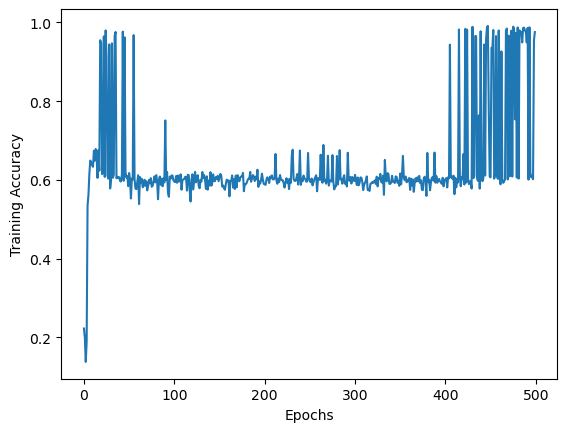

In [12]:
train_accuracy = []

for i in range(len(loss_weight_dict)):
    train_accuracy.append(loss_weight_dict[i]['train_accuracy'])
import matplotlib.pyplot as plt
plt.plot(train_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.show()